In [235]:
#1. Clustering:

In [236]:
#Part-(a)

In [237]:
import numpy as np # linear algebra
import pandas as pd # data processing


from warnings import filterwarnings
filterwarnings("ignore")

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN

In [238]:
df = pd.read_csv("/home/prathiba/Downloads/DataClustering.csv")
df.head()

,x1,x2,x3,x4
0,0.832354,1.389428,0.962226,0.993671
1,1.256087,1.500487,0.904118,0.738035
2,0.976953,1.058524,1.217530,1.357238
3,1.014365,1.122684,1.195847,0.984144
4,1.041386,1.219014,0.864819,1.720825


In [239]:
df.shape

(351, 4)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      351 non-null    float64
 1   x2      351 non-null    float64
 2   x3      351 non-null    float64
 3   x4      351 non-null    float64
dtypes: float64(4)
memory usage: 11.1 KB


In [241]:
df.describe()

,x1,x2,x3,x4
count,351.000000,351.000000,351.000000,351.000000
mean,0.278820,0.472738,1.643857,1.482918
std,0.341446,0.511023,1.668052,0.964016
min,0.048604,0.047022,0.367717,0.232562
25%,0.111341,0.115257,0.815180,0.857948
50%,0.153383,0.165684,1.083528,1.190996
75%,0.212564,0.854725,1.557597,1.724461
max,2.037125,2.476118,12.635585,7.726843


In [242]:
#correlation
df_corr = df.corr()
df.corr()

,x1,x2,x3,x4
x1,1.000000,0.477973,-0.099997,-0.188592
x2,0.477973,1.000000,-0.220270,-0.293447
x3,-0.099997,-0.220270,1.000000,-0.118288
x4,-0.188592,-0.293447,-0.118288,1.000000


In [243]:
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,x1,x2,x3,x4
x1,1.000000,0.477973,-0.099997,-0.188592
x2,0.477973,1.000000,-0.220270,-0.293447
x3,-0.099997,-0.220270,1.000000,-0.118288
x4,-0.188592,-0.293447,-0.118288,1.000000


Text(0, 0.5, 'Count')

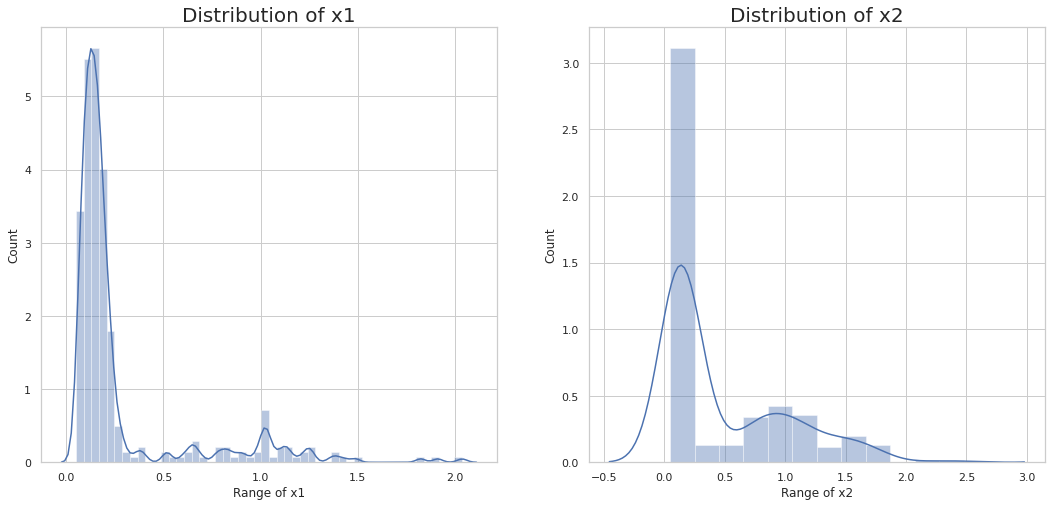

In [244]:
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['x1'])
plt.title('Distribution of x1', fontsize = 20)
plt.xlabel('Range of x1')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['x2'])
plt.title('Distribution of x2', fontsize = 20)
plt.xlabel('Range of x2')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

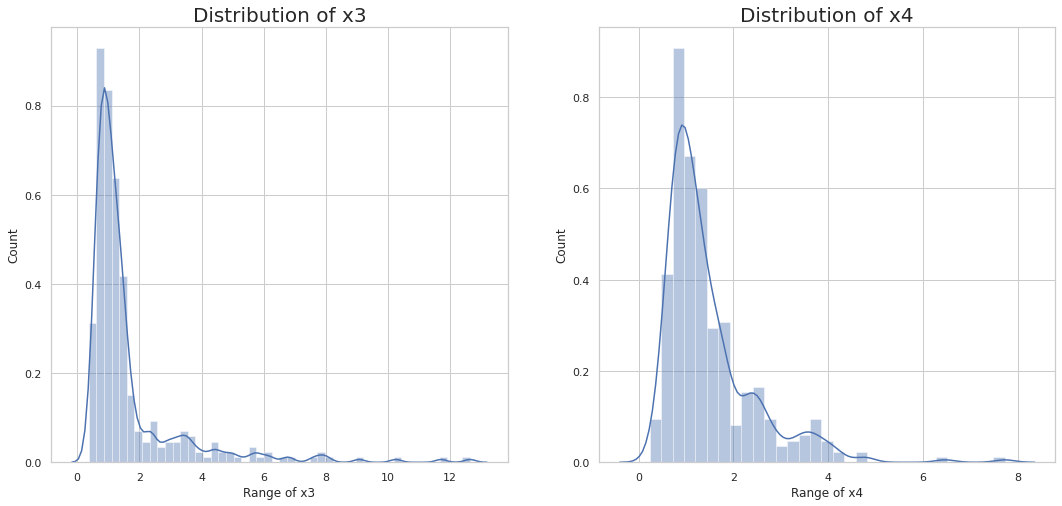

In [245]:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['x3'])
plt.title('Distribution of x3', fontsize = 20)
plt.xlabel('Range of x3')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['x4'])
plt.title('Distribution of x4', fontsize = 20)
plt.xlabel('Range of x4')
plt.ylabel('Count')

In [246]:
# From above plots it is clear that all features are left skewed.
#To get Gaussian like distribution we are using log transformation.

In [247]:
data = np.log(df)

In [248]:
data.head()

,x1,x2,x3,x4
0,-0.183497,0.328892,-0.038506,-0.006349
1,0.228002,0.405790,-0.100796,-0.303764
2,-0.023316,0.056876,0.196825,0.305452
3,0.014262,0.115722,0.178854,-0.015983
4,0.040552,0.198042,-0.145235,0.542804


Text(0, 0.5, 'Count')

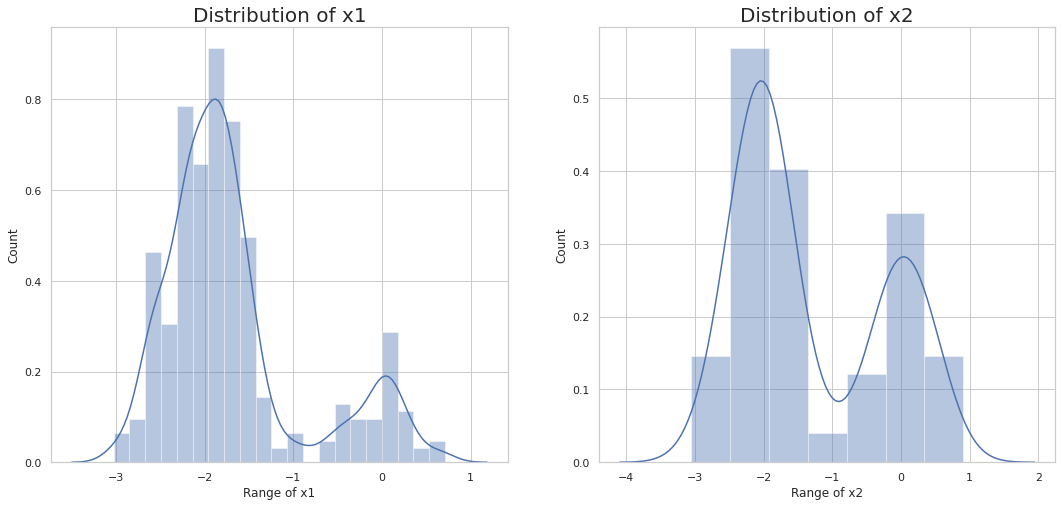

In [249]:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['x1'])
plt.title('Distribution of x1', fontsize = 20)
plt.xlabel('Range of x1')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['x2'])
plt.title('Distribution of x2', fontsize = 20)
plt.xlabel('Range of x2')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

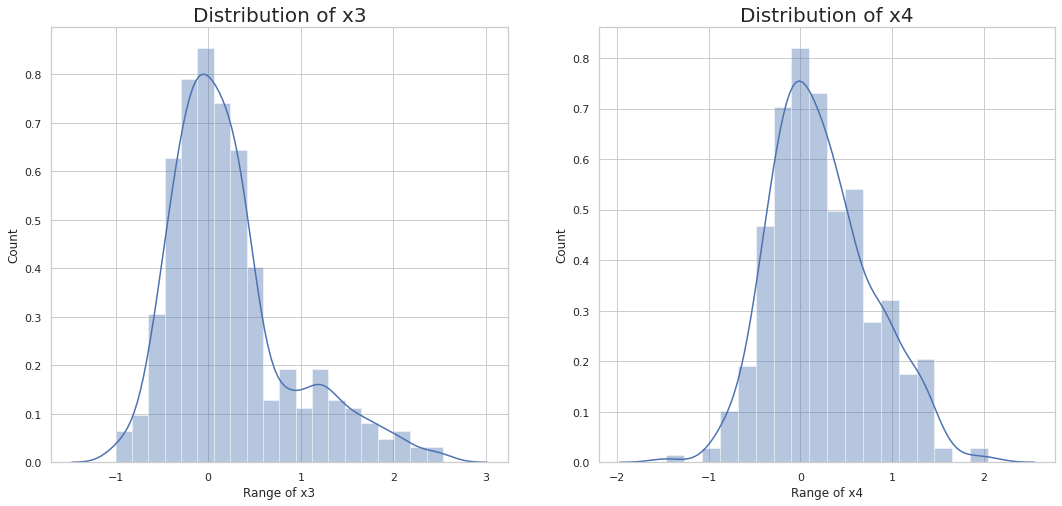

In [250]:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['x3'])
plt.title('Distribution of x3', fontsize = 20)
plt.xlabel('Range of x3')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['x4'])
plt.title('Distribution of x4', fontsize = 20)
plt.xlabel('Range of x4')
plt.ylabel('Count')

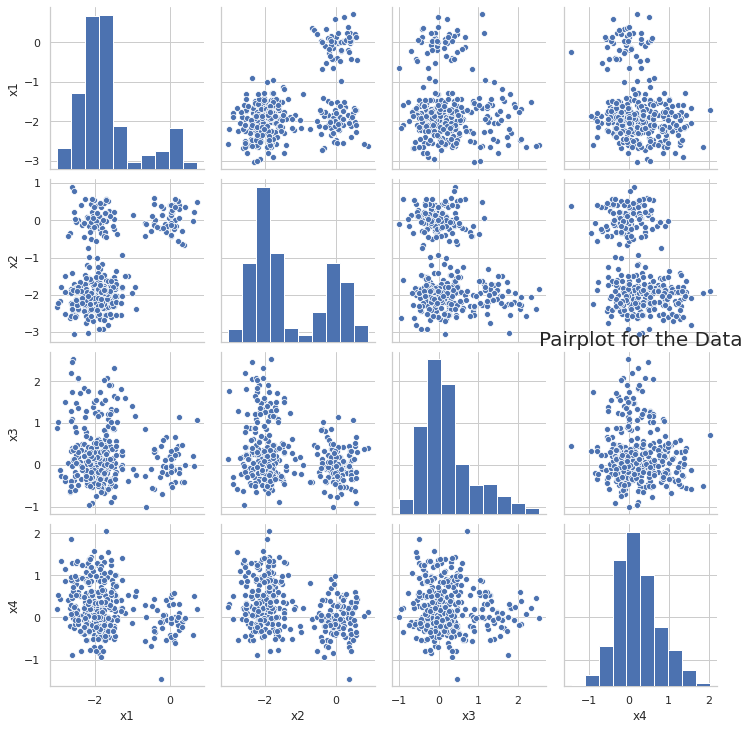

In [251]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

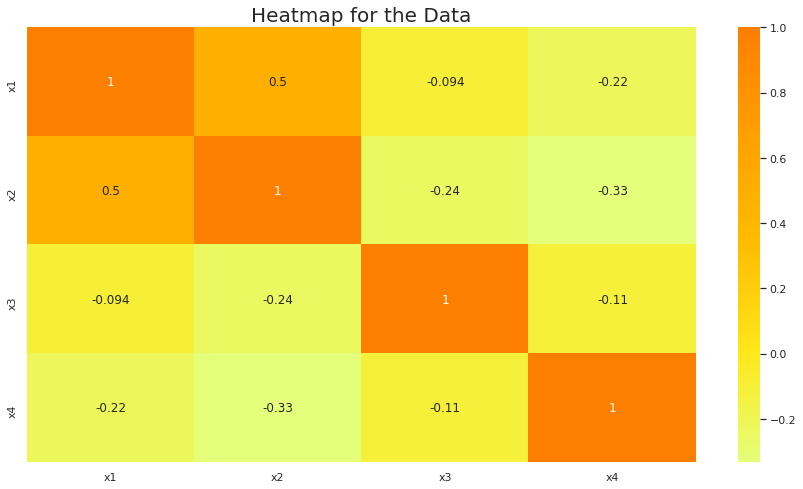

In [252]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [253]:
#The Above Graph Showing the correlation between the different features of the dataset.
#This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.
#The correlation among the features is less than 0.5.
#We can clearly see that these attributes do not have good correlation among them, 
#that's why we will proceed with all of the features.

In [254]:
#Part-(b)
#Train k-means, and find the appropriate number of k.

In [255]:
#Using t-SNE we can reduce our high dimensional features vector to 2 dimensions.
#By using the 2 dimensions as x,y coordinates, the datset can be plotted.

#t-Distributed Stochastic Neighbor Embedding (t-SNE) 
#reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. 
#It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space.

In [256]:
#Dimentionality Reduction with t-SNE :-

In [257]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
data_embedded = tsne.fit_transform(data)

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 351 samples in 0.000s...
[t-SNE] Computed neighbors for 351 samples in 0.026s...
[t-SNE] Computed conditional probabilities for sample 351 / 351
[t-SNE] Mean sigma: 0.796040
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.787655
[t-SNE] KL divergence after 1000 iterations: 0.190200


In [258]:
data_embedded.shape

(351, 2)

In [259]:
data_embedded

array([[-3.5685227e+00,  5.7781906e+00],
       [-3.5911596e+00,  6.3949647e+00],
       [-3.7293336e+00,  6.1758404e+00],
       [-3.4588044e+00,  6.1766744e+00],
       [-4.1359172e+00,  6.0206094e+00],
       [-3.9987302e+00,  6.3949852e+00],
       [-3.4693844e+00,  6.7250257e+00],
       [-2.9998784e+00,  5.8166914e+00],
       [-3.9781845e+00,  5.5205302e+00],
       [-2.9971750e+00,  5.8401942e+00],
       [-3.9806480e+00,  6.0159512e+00],
       [-2.8078887e+00,  6.3035831e+00],
       [-3.9674113e+00,  6.2189212e+00],
       [-3.5471892e+00,  5.4024243e+00],
       [-3.6304519e+00,  6.0309911e+00],
       [-4.0931349e+00,  6.5765553e+00],
       [-2.9332600e+00,  5.6221681e+00],
       [-3.6261806e+00,  5.6891470e+00],
       [-3.2367063e+00,  6.6007190e+00],
       [-3.1098709e+00,  6.1914425e+00],
       [-4.0944333e+00,  6.6184421e+00],
       [-3.8826618e+00,  6.2886810e+00],
       [-3.3820641e+00,  6.4702692e+00],
       [-3.5521812e+00,  5.2822046e+00],
       [-3.47056

In [260]:
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters=n, random_state=21, algorithm='elkan')
    model.fit(data_embedded)
    inertia.append(model.inertia_)

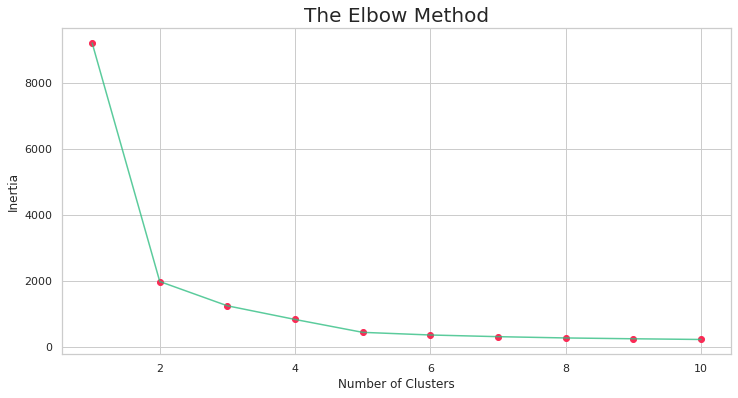

In [261]:
plt.figure(figsize = (12 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o', c=sns.xkcd_rgb['red pink'])
plt.plot(np.arange(1 , 11) , inertia , '-' ,c=sns.xkcd_rgb['greenish teal'], alpha = 0.8)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters') 
plt.ylabel('Inertia')
plt.show()


In [262]:
#Number of clusters = 5

In [263]:
model = KMeans(n_clusters=5, random_state= 21, algorithm='elkan')
model.fit(data_embedded)
labels = model.labels_

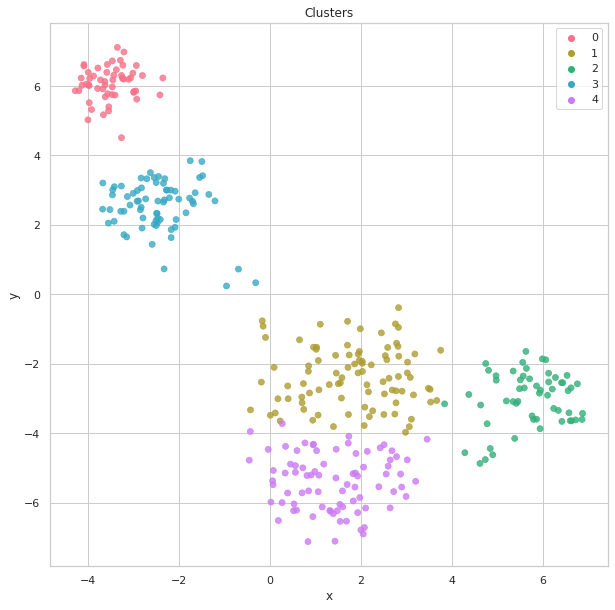

In [264]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=data_embedded[:,0],
                y=data_embedded[:,1],
                hue=labels,
                palette=sns.color_palette('husl', 5),
                edgecolor=None,
                alpha=0.8,
                ax=axs)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters')
plt.show()

In [265]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(data)
df['y'] = y_pred

In [266]:
#Number of clusters = 6

In [267]:
model = KMeans(n_clusters=6, random_state= 21, algorithm='elkan')
model.fit(data_embedded)
labels = model.labels_

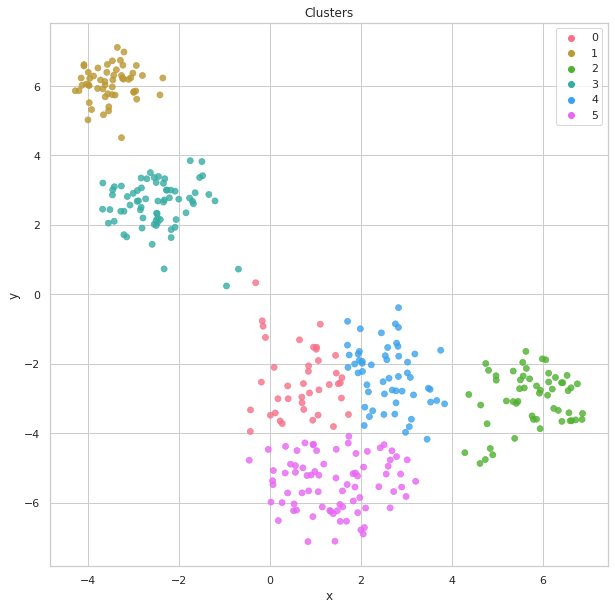

In [268]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=data_embedded[:,0],
                y=data_embedded[:,1],
                hue=labels,
                palette=sns.color_palette('husl', 6),
                edgecolor=None,
                alpha=0.8,
                ax=axs)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters')
plt.show()

In [269]:
#Part-(c)
#Train DBSCAN, and see if by varying MinPts and ε, you can get the same number of clusters as k-means


In [270]:
model = DBSCAN(eps=0.5, min_samples=10)
labels = model.fit_predict(data)

In [271]:
np.unique(labels)


array([-1,  0,  1,  2,  3])

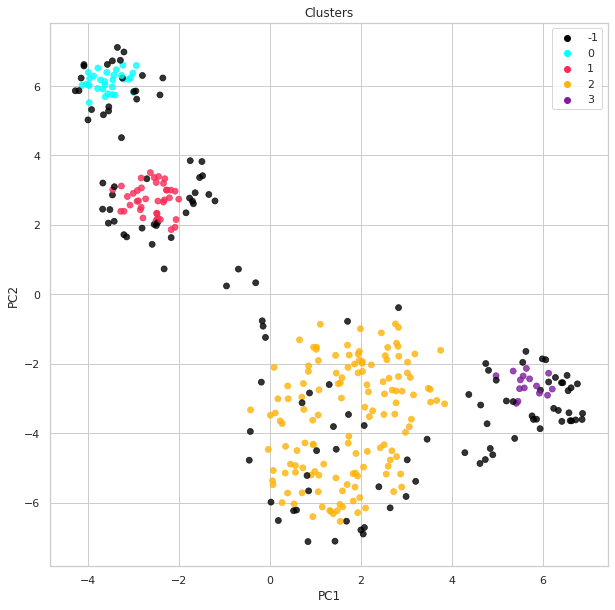

In [272]:
fig, axs = plt.subplots(figsize=[10,10])
sns.scatterplot(x=data_embedded[:,0],
                y=data_embedded[:,1],
                hue=labels,
                palette=sns.xkcd_palette([ 'black', 'cyan', 'red pink', 'amber', 'purple']),
                edgecolor=None,
                alpha=0.8,
                ax=axs)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters')
plt.show()

In [273]:
#Part-(d)
#Using the cluster assignment as the label, visualize the t-sne embedding.

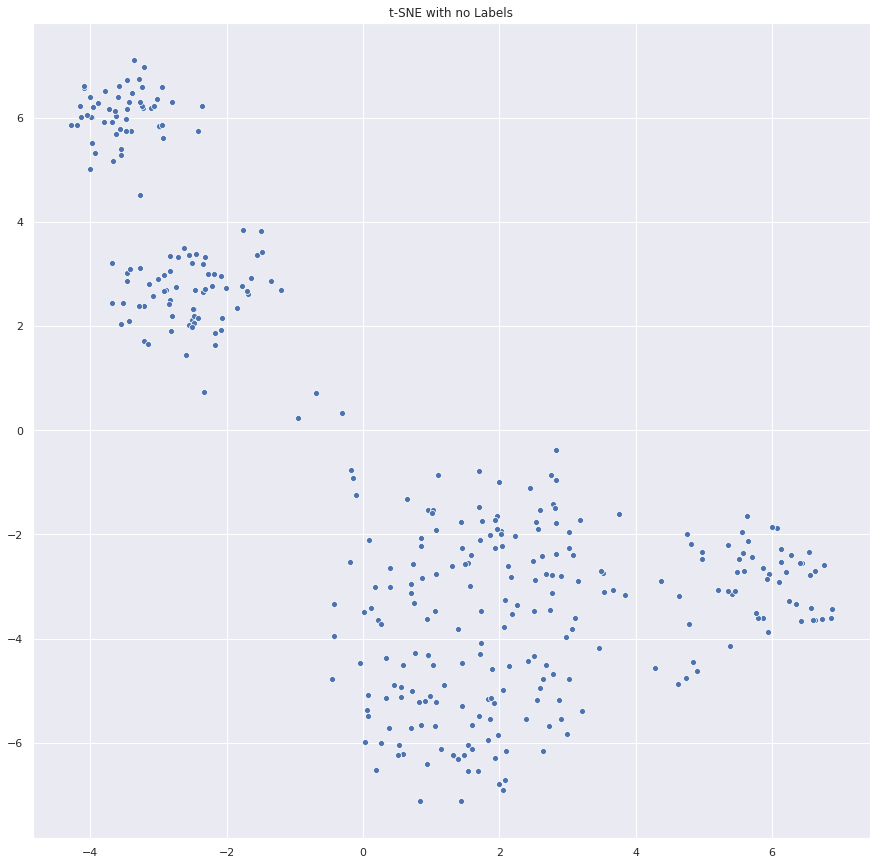

In [274]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(data_embedded[:,0], data_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.show()

In [275]:
#This looks pretty bland. There are some clusters we can immediately detect, 
#but the many instances closer to the center are harder to separate.
#t-SNE did a good job at reducing the dimensionality, but now we need some labels.
#Let's use the clusters found by k-means as labels.
#This will help visually separate different concentrations of topics

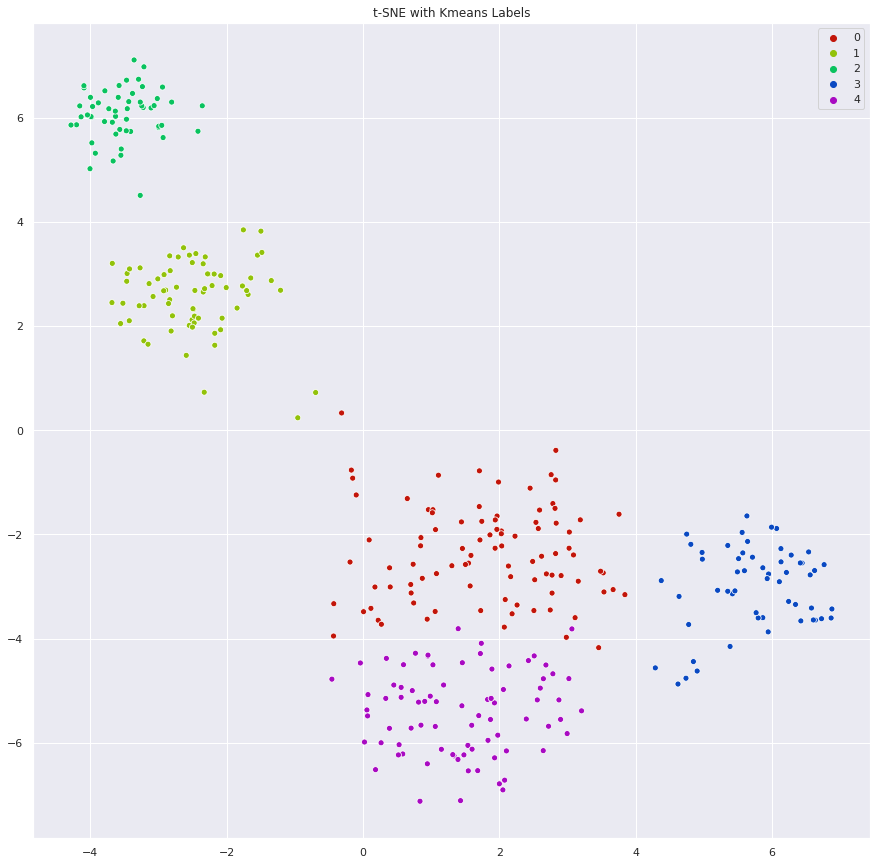

In [276]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(5, l=.4, s=.9)

# plot
sns.scatterplot(data_embedded[:,0], data_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

In [277]:
df.head(100)

,x1,x2,x3,x4,y
0,0.832354,1.389428,0.962226,0.993671,2
1,1.256087,1.500487,0.904118,0.738035,2
2,0.976953,1.058524,1.217530,1.357238,2
3,1.014365,1.122684,1.195847,0.984144,2
4,1.041386,1.219014,0.864819,1.720825,2
...,...,...,...,...,...
95,0.100987,0.918612,1.649290,0.667837,1
96,0.119908,0.962583,0.632678,0.865749,1
97,0.122746,0.802459,0.744929,1.059187,1
98,0.077335,1.234838,0.694377,0.773580,1


In [278]:
#Now we can see that cluster numbers also added to the dataset

In [279]:
#2. PCA:

In [280]:
#part-(a) Visualize the data from the file DataPCA.csv.

In [281]:
import numpy as np # linear algebra
import pandas as pd # data processing


from warnings import filterwarnings
filterwarnings("ignore")

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [282]:
df1 = pd.read_csv('/home/prathiba/Downloads/DataPCA.csv')

In [283]:
df1.head()

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367


In [284]:
df1.shape

(190, 7)

In [285]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


In [286]:
df1.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,1.286644,-1.135656,5.254907,3.342504,4.233765,-0.412937,-0.119058
std,0.508765,0.233921,0.549171,0.995603,0.328327,0.482069,0.239692
min,-0.074116,-1.734167,3.967657,0.649854,3.306106,-1.936695,-0.786517
25%,0.928244,-1.298233,4.883782,2.645102,4.020569,-0.741547,-0.278181
50%,1.271034,-1.145689,5.249568,3.400840,4.242064,-0.377963,-0.122850
75%,1.637682,-0.997318,5.625487,3.996560,4.463035,-0.096413,0.036964
max,2.504835,-0.440730,6.857529,5.817673,5.056247,0.823165,0.526882


In [287]:
#Correlation
df1_corr = df1.corr()
df1_corr

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,-0.215312,0.845144,-0.925055,-0.438377,-0.797697,-0.600302
x2,-0.215312,1.000000,0.330902,-0.023173,-0.699865,-0.205240,0.551619
x3,0.845144,0.330902,1.000000,-0.883491,-0.835252,-0.920829,-0.218335
x4,-0.925055,-0.023173,-0.883491,1.000000,0.522152,0.774758,0.627162
x5,-0.438377,-0.699865,-0.835252,0.522152,1.000000,0.834780,-0.327854
x6,-0.797697,-0.205240,-0.920829,0.774758,0.834780,1.000000,0.058808
x7,-0.600302,0.551619,-0.218335,0.627162,-0.327854,0.058808,1.000000


In [288]:
df1_corr.style.background_gradient(cmap='coolwarm', axis=None)

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,-0.215312,0.845144,-0.925055,-0.438377,-0.797697,-0.600302
x2,-0.215312,1.000000,0.330902,-0.023173,-0.699865,-0.205240,0.551619
x3,0.845144,0.330902,1.000000,-0.883491,-0.835252,-0.920829,-0.218335
x4,-0.925055,-0.023173,-0.883491,1.000000,0.522152,0.774758,0.627162
x5,-0.438377,-0.699865,-0.835252,0.522152,1.000000,0.834780,-0.327854
x6,-0.797697,-0.205240,-0.920829,0.774758,0.834780,1.000000,0.058808
x7,-0.600302,0.551619,-0.218335,0.627162,-0.327854,0.058808,1.000000


In [289]:
#we can see that data is highly correlated.

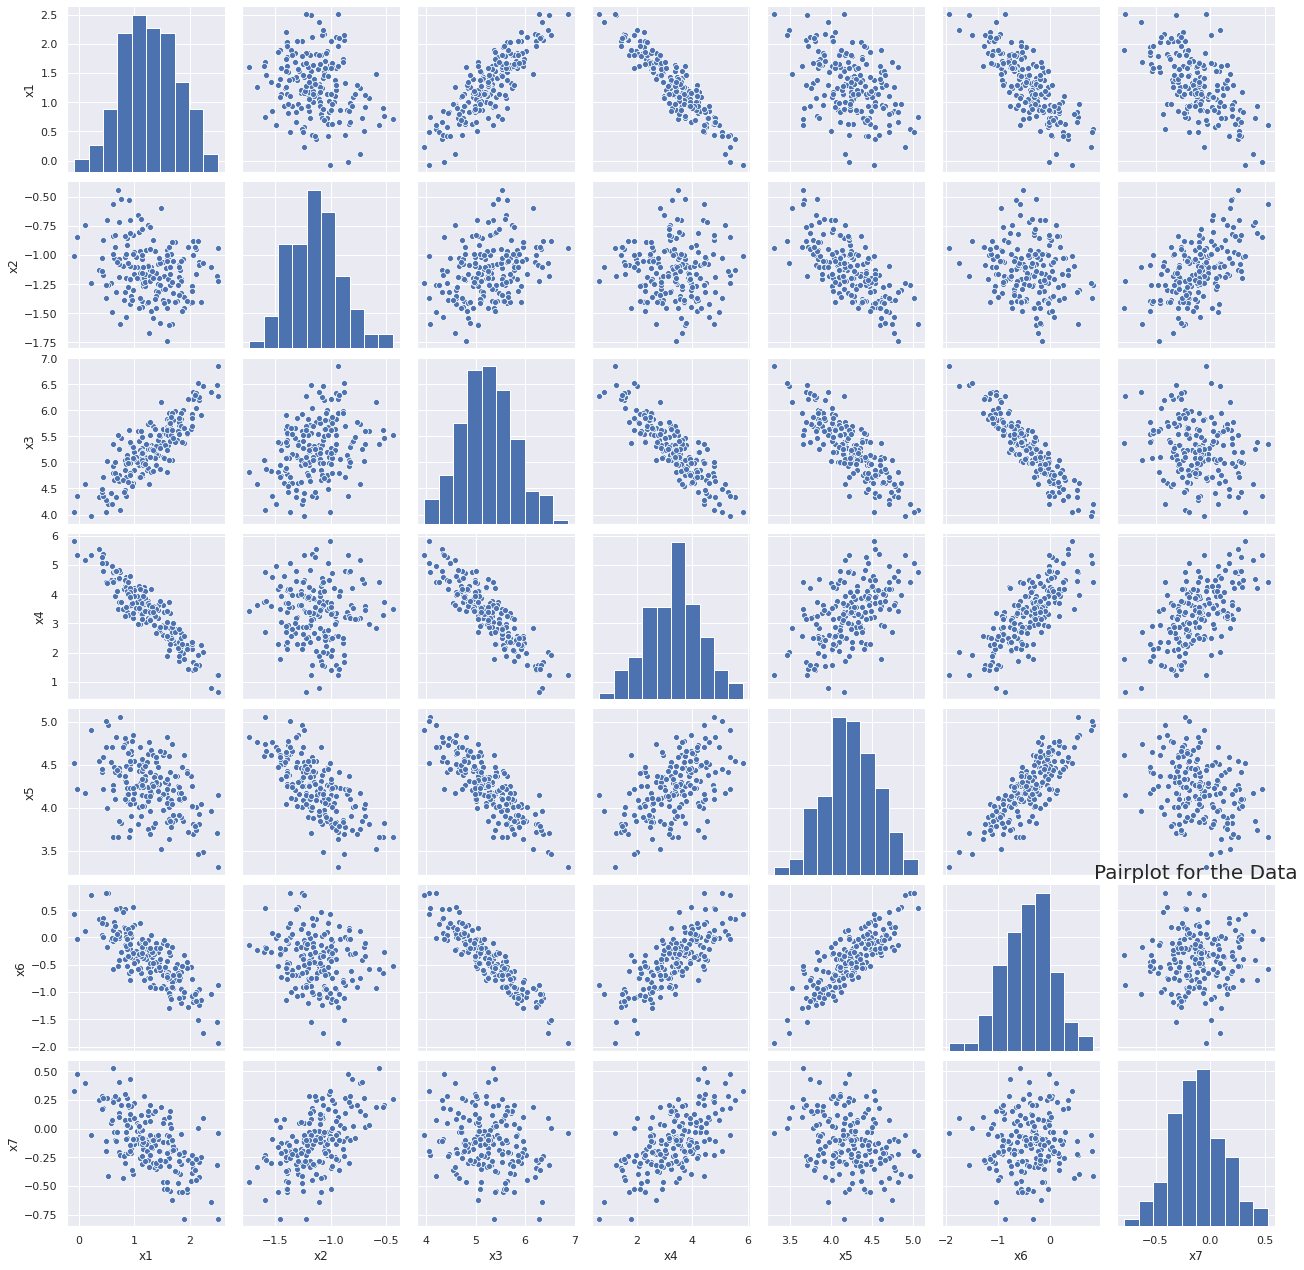

In [290]:
sns.pairplot(df1)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

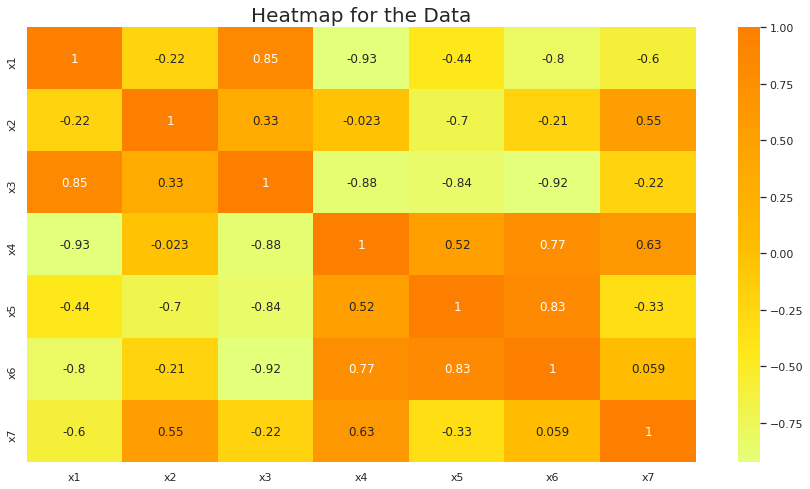

In [291]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df1.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [292]:
#part-(b) Train PCA.

In [293]:
# PCA performs best with a normalized feature set.
#We will perform standard scalar normalization to normalize our feature set.

In [294]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df1 = sc.fit_transform(df1)

In [295]:
df1

array([[-0.87970185,  0.20358106, -0.7178119 , ...,  0.24030982,
         0.572178  ,  0.81782988],
       [ 0.06690112, -0.16483345, -0.01377784, ...,  0.15160586,
         0.10228252, -0.215624  ],
       [ 0.49517799, -0.17241562,  0.55017623, ..., -0.80067599,
        -0.98890001,  0.83524673],
       ...,
       [ 0.7726511 , -0.39257257,  0.65526181, ..., -0.57237401,
        -1.02614162,  0.08363971],
       [ 0.80132199, -0.80445602,  0.39375587, ..., -0.07767042,
        -0.58435868, -0.29291356],
       [ 1.02385053, -0.906317  ,  0.5235481 , ...,  0.02058323,
        -0.57800454, -0.43309953]])

In [296]:
#Define two components  
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(df1) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-1.597024,0.826766
1,-0.044709,-0.326855
2,1.059892,0.742775
3,-3.889508,1.214780
4,1.268405,-0.523475


In [297]:
print(pca.components_)

[[ 0.43317128  0.10688441  0.47876303 -0.44964211 -0.37624049 -0.45319076
  -0.15035799]
 [-0.27755113  0.58261645  0.07397819  0.20409753 -0.41973091 -0.10010361
   0.59177707]]


In [298]:
#Let's see how much we can reduce the dimensions while still keeping 95% variance.
#We will apply Principle Component Analysis (PCA) to our datassest. 
#The reason for this is that by keeping a large number of dimensions with PCA, 
#we don’t destroy much of the information, but hopefully will remove some noise/outliers from the data,
#and make the clustering problem easier.

In [299]:
explained_variance = pca.explained_variance_ratio_

In [300]:
print(explained_variance)

[0.60927057 0.31946097]


In [301]:
#It can be seen that first principal component is responsible for 60.9% variance. 
#Similarly, the second principal component causes 31.9% variance in the dataset. 
#Collectively we can say that (60.9 + 31.9) 92.8% percent of the information contained
#in the feature set is captured by the first two principal components.



In [302]:
#part-(c):-plot the variance explained versus PCA dimensions.

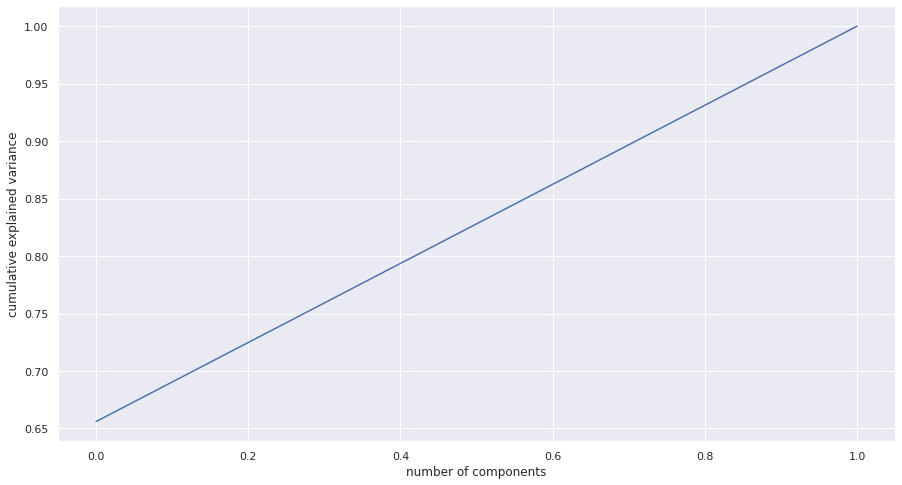

In [303]:
pca = PCA().fit(principalDf)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Text(0, 0.5, 'explained variance')

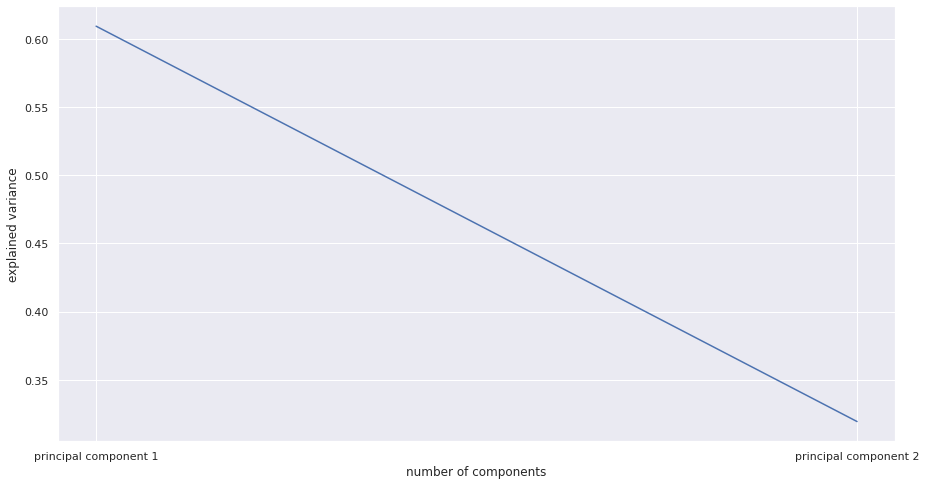

In [304]:
plt.plot(principalDf.columns, explained_variance,)
plt.xlabel('number of components')
plt.ylabel('explained variance')

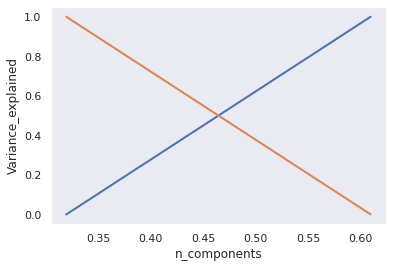

In [305]:

percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(explained_variance, pca.components_, linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Variance_explained')  
plt.show()

In [306]:
#part-(d):-Reconstruct the data with various numbers of PCA dimensions, and compute the MSE.

In [307]:
df_new = pca.inverse_transform(principalDf)

In [308]:
df_new.shape

(190, 2)

In [309]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error



components = [2,3,4,5,6]    
for n in components:
    pca = PCA(n_components=n)
    recon = pca.inverse_transform(pca.fit_transform(df1))
    rmse = mean_squared_error(df1[0], recon[0],squared=False)
    print("RMSE: {} with {} components".format(rmse, n))

RMSE: 0.06407741576234394 with 2 components
RMSE: 0.005701448656503754 with 3 components
RMSE: 0.004749695594779023 with 4 components
RMSE: 0.004747506368296759 with 5 components
RMSE: 0.00036550635978835577 with 6 components


In [310]:
#part-(3). Non-linear dimension reduction:
#part-(a). Visualize the data from the file DataKPCA.csv.

In [311]:
df2 = pd.read_csv("/home/prathiba/Downloads/DataKPCA.csv")
df2.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


In [312]:
df2.shape

(190, 7)

In [313]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


In [314]:
df2.describe()

,x1,x2,x3,x4,x5,x6,x7
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,3.121555,14.985682,-47.909555,-8.811677,-2.175834,1.893953,1.958302
std,0.589013,1.298751,2.459375,2.337179,0.505819,0.159647,0.108756
min,1.964315,11.577329,-52.837231,-14.068488,-3.613443,1.750006,1.761394
25%,2.679532,14.087484,-49.736194,-10.392405,-2.512570,1.773690,1.880257
50%,3.039420,14.943396,-48.185549,-9.045948,-2.156469,1.852369,1.942348
75%,3.489341,15.764749,-46.405402,-7.235609,-1.828925,1.954614,2.018826
max,4.820967,18.747792,-40.772554,-1.907331,-0.972995,2.580983,2.332842


In [315]:
#Correlation
df2_corr = df2.corr()
df2_corr

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,-0.192768,-0.815308,0.924728,0.444921,-0.617167,-0.567600
x2,-0.192768,1.000000,-0.333149,0.028781,0.699611,-0.178769,0.564269
x3,-0.815308,-0.333149,1.000000,-0.862548,-0.831090,0.828093,0.204812
x4,0.924728,0.028781,-0.862548,1.000000,0.520445,-0.633372,-0.603537
x5,0.444921,0.699611,-0.831090,0.520445,1.000000,-0.737043,0.330256
x6,-0.617167,-0.178769,0.828093,-0.633372,-0.737043,1.000000,0.034170
x7,-0.567600,0.564269,0.204812,-0.603537,0.330256,0.034170,1.000000


In [316]:
df2_corr.style.background_gradient(cmap='coolwarm', axis=None)

,x1,x2,x3,x4,x5,x6,x7
x1,1.000000,-0.192768,-0.815308,0.924728,0.444921,-0.617167,-0.567600
x2,-0.192768,1.000000,-0.333149,0.028781,0.699611,-0.178769,0.564269
x3,-0.815308,-0.333149,1.000000,-0.862548,-0.831090,0.828093,0.204812
x4,0.924728,0.028781,-0.862548,1.000000,0.520445,-0.633372,-0.603537
x5,0.444921,0.699611,-0.831090,0.520445,1.000000,-0.737043,0.330256
x6,-0.617167,-0.178769,0.828093,-0.633372,-0.737043,1.000000,0.034170
x7,-0.567600,0.564269,0.204812,-0.603537,0.330256,0.034170,1.000000


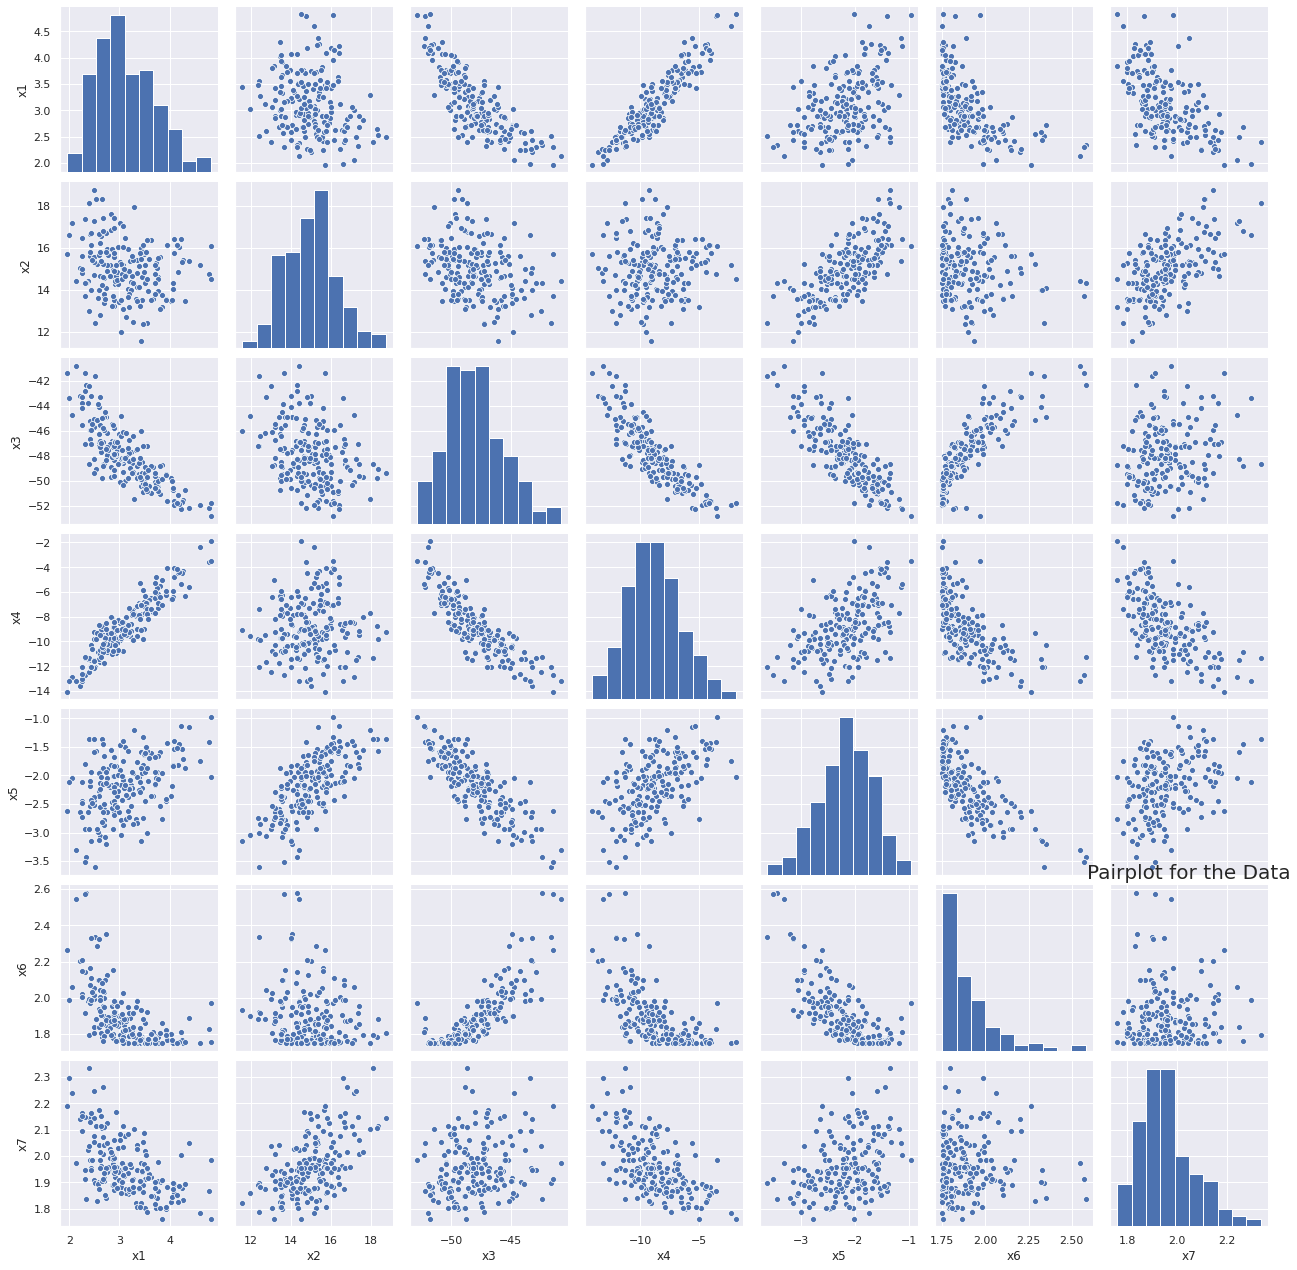

In [331]:
sns.pairplot(df2)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

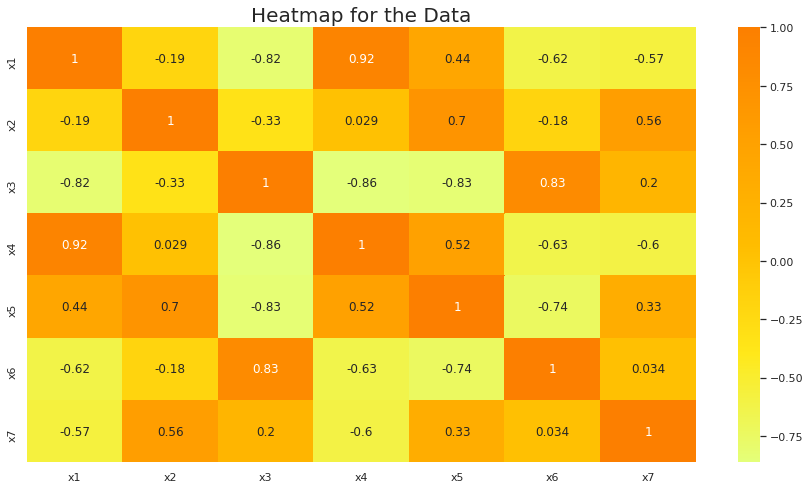

In [318]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df2.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

In [319]:
#From above Heat map, it is clear that the variables are highly correlated.

In [320]:
#Part-(b). Train KPCA.

In [321]:
from sklearn.decomposition import PCA,SparsePCA,KernelPCA,NMF
from sklearn.datasets import make_circles

In [322]:
KPCA = KernelPCA(n_components = 10, kernel="rbf", fit_inverse_transform=True, gamma=10)
KPCA_fit = KPCA.fit(df2)
X_KPCA = KPCA.fit_transform(df2)
X_KPCA=pd.DataFrame(data=X_KPCA,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']) 
#X_KPCA_back = KPCA.inverse_transform(X_KPCA)

In [323]:
X_KPCA.shape

(190, 10)

In [324]:
X_KPCA.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-0.010418,-0.012626,-0.007111,-0.012520,-0.006979,-0.001059,0.007153,-0.014837,-0.006417,-0.006804
1,-0.049909,0.421218,0.108082,0.067429,0.020342,0.001953,-0.012596,0.023165,0.007819,0.008513
2,-0.010530,-0.011977,-0.010419,-0.013511,-0.007375,-0.001254,0.007637,-0.015735,-0.007065,-0.007288
3,-0.011694,-0.013761,-0.012085,-0.015900,-0.008873,-0.001544,0.009461,-0.019670,-0.009029,-0.009417
4,0.036282,-0.007992,-0.006773,-0.015559,-0.006712,-0.001307,0.011367,-0.008491,-0.005464,-0.005766


In [325]:
#Part-(C). Plot the variance explained versus KPCA dimensions for up to 10 dimensions.

In [326]:
expl_var_kpca = np.var(X_KPCA, axis=0)

In [327]:
expl_var_ratio_kpca = expl_var_kpca / np.sum(expl_var_kpca)

In [328]:
print(X_KPCA.columns)

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'], dtype='object')


Text(0, 0.5, 'cumulative explained variance')

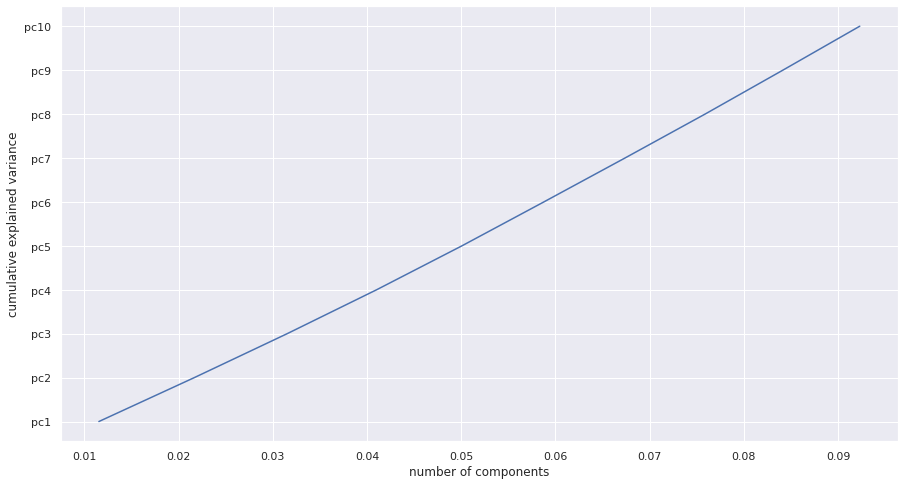

In [329]:

plt.plot(np.cumsum(expl_var_kpca),X_KPCA.columns)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'explained variance')

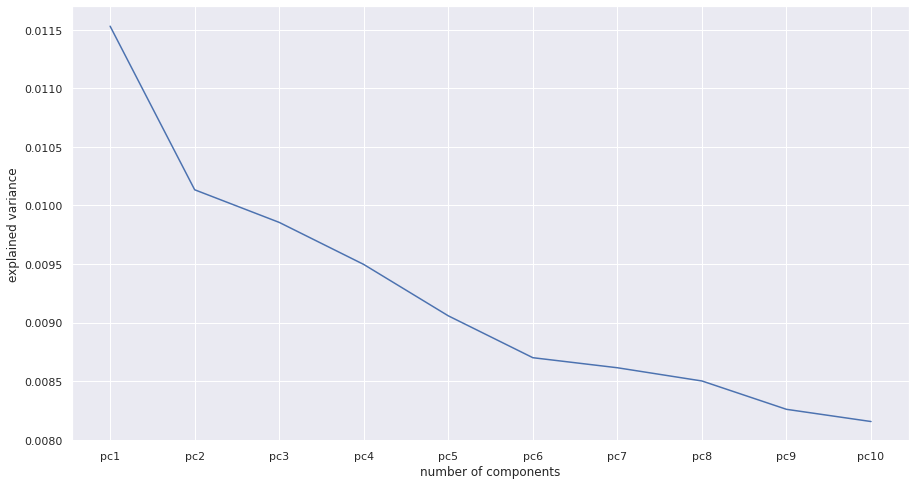

In [330]:
plt.plot(X_KPCA.columns,expl_var_kpca)
plt.xlabel('number of components')
plt.ylabel('explained variance')